<a href="https://colab.research.google.com/github/leandroguarato/data_science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise dos Dados do **Airbnb em Veneza, Itália**

O [Airbnb](https://www.airbnb.com.br/) começou em 2008 e já é considerado como sendo a **maior empresa hoteleira da atualidade**, mesmo sem possuir um único hotel! Ao final de 2018 a Startup completava 10 anos desde sua fundação e já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as grandes redes hoteleiras tradicionais.

Seu principal negócio está na conexão de pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis (ou parte deles) de maneira prática, fornecendo uma plataforma inovadora para tornar essa **hospedagem alternativa** e viável.

O Airbnb faz parte da **economia do compartilhamento**, que pressupõe novas formas de estruturação do trabalho, na mutualização dos bens, espaços e instrumentos, na organização dos cidadãos em redes ou comunidades e que, geralmente, são intermediadas por plataformas de internet.

Uma das iniciativas da empresa neste sentido é disponibilizar dados do site de algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de **Data Science**.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste *notebook*, iremos analisar os dados referentes à cidade de **Veneza, situada no nordeste da Itália**, um dos mais importantes destinos turísticos do mundo, e ver quais insights podem ser extraídos a partir dos dados brutos disponibilizados.

Veneza é uma cidade situada sobre um grupo de 117 pequenas ilhas separadas por canais e ligadas por pontes. Localizada na pantanosa Lagoa de Veneza, que se estende ao longo da costa entre as bocas dos rios Po e Piave. **A cidade é muito famosa pela beleza de sua arquitetura e obras de arte, sendo uma parte dela listada pela UNESCO como Patrimônio da Humanidade**, juntamente com a sua lagoa.

<center><img alt="Canal de Veneza" width="80%" src="https://github.com/leandroguarato/data_science/raw/master/Canaldeveneza.jpg"></center>

Veneza é a capital da região de Veneto. **Estima-se que atualmente a população no centro histórico de Veneza seja de aproximadamente 50 mil habitantes**, número que vem reduzindo sistematicamente desde a Segunda Guerra Mundial, quando se estimava uma população em torno de 175 mil habitantes. O principal motivo é o aumento expressivo do turismo na cidade, tornando os aluguéis e o custo de vida no local muito altos.

**O centro da cidade segue uma tradição de divisão em bairros chamados *sestieri* (plural de *sestiere*), que são os seis a seguir: a) Cannaregio, b) Castello, c) Dorsoduro (inclui a ilha Giudecca), d) San Marco, e) San Polo e f) Santa Croce.** Além do centro histórico situado na ilha principal, há também outras ilhas na lagoa e a parte situada em *Terraferma* (continente), principalmente na grande *frazioni* (equivalente a "paróquias" ou "divisões" em outros países) de Mestre e Marghera.

## Obtenção dos Dados


Conforme já mencionado, os dados foram obtidos no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), e este *dataset* que utilizamos é uma versão "resumida" do Airbnb para a cidade de Veneza.

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv('http://data.insideairbnb.com/italy/veneto/venice/2020-04-29/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome do imóvel anunciado
* `host_id` - número de id do proprietário (anfitrião) do imóvel
* `host_name` - nome do anfitrião
* `neighbourhood_group` - informa se o imóvel está no continente (*terraferma*) ou em alguma ilha (*isole*)
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que o imóvel possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43823,12.32902,Entire home/apt,225,7,162,2019-11-06,1.27,3,326
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,San Polo,45.43845,12.32869,Entire home/apt,272,7,64,2019-11-03,0.61,3,1
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43827,12.32764,Entire home/apt,122,4,184,2019-10-07,1.51,3,105
3,27116,Charming room with balcony close to S. Mark's,116144,Gianni,Isole,San Marco,45.43221,12.33411,Private room,190,1,410,2020-02-21,3.46,2,318
4,33934,LOVELY APARTMENT IN THE CENTER,119219,Elisa,Isole,Cannaregio,45.44480,12.33121,Entire home/apt,103,2,133,2019-10-13,1.13,1,89


___

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

É preciso identificar a quantidade de entradas e variáveis que nosso conjunto de dados possui, além de ver os tipos de cada coluna.

Embora estejamos utilizando este *dataset* menor, na mesma página que baixamos o arquivo `listings.csv` há uma versão mais completa tendo as mesmas 8829 entradas, porém com um total de 106 variáveis - `listings.csv.gz`.

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)  # Ou somente df.types

Entradas:	 8829
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

___


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É essencial compreender se esses valores nulos são significativos comparados ao total de entradas.

* Diante da análise abaixo demonstrada, é possível ver que as colunas `reviews por month` e `last_review` possuem 13,16% dos seus valores faltantes, enquanto a coluna `host_name` possui apenas 1 valor nulo, o que significa menos de 0,01% dos valores totais.

Entretanto, esses dados faltantes não são sensíveis ao ponto de prejudicar as análises, e podemos prosseguir sem a necessidade de excluir por completo os registros que apresentam tais ausências.


In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.131612
last_review                       0.131612
host_name                         0.000113
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

___


### **Q3. Qual o tipo de distribuição das variáveis?** 

Uma das melhores maneiras de identificar a distribuição dos dados e a presença de *outliers* (valores discrepantes) é plotando-os em gráficos em forma de histogramas. 

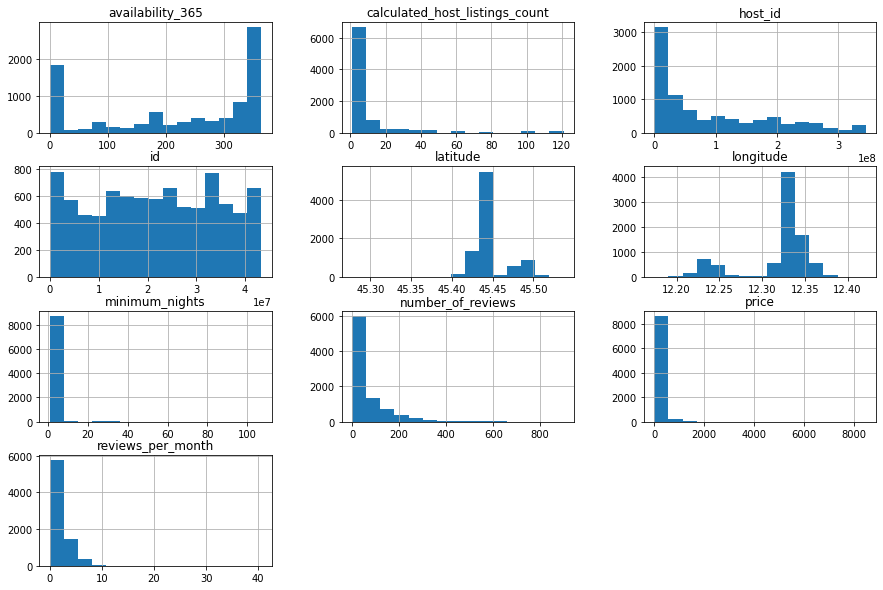

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

___


### **Q4. Há outliers presentes no dataset?**

Pela distribuição dos histogramas vistos acima, verificamos que há  indícios da presença de alguns *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam na detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotagem de `boxplots` para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8829.000000,8829.000000,8829.000000,7667.000000,8829.000000,8829.000000
mean,147.028203,2.138521,60.060822,1.880480,10.793182,220.382943
std,199.148896,2.523779,85.153467,1.894344,20.973613,140.195368
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,78.000000,1.000000,4.000000,0.450000,1.000000,89.000000
50%,110.000000,2.000000,25.000000,1.310000,3.000000,268.000000
75%,150.000000,2.000000,81.000000,2.710000,8.000000,351.000000
max,8459.000000,107.000000,899.000000,40.600000,121.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% dos valores abaixo de 150 euros, porém o maior valor do conjunto de dados é de 8459,00 euros, valor que muito provavelmente é um erro constante do *dataset*, o que virá a distorcer as nossas análises relacionadas aos preços de hospedagem.
* A variável `minimum_nights` (quantidade mínima de noites), por sua vez, possui 75% dos valores entre 1 e 2 dias, e traz um valor máximo de 107 dias, o que também aparenta ser um erro do *dataset* e pode acarretará em prejuízo às análises.
* Quanto à variável `calculated_host_listings_count`, que representa a quantidade de imóveis do mesmo anfitrião na cidade, embora aparentemente tenha um valor máximo discrepante de 121, não analisaremos este dado especificamente.

#### Boxplot para *minimum_nights*

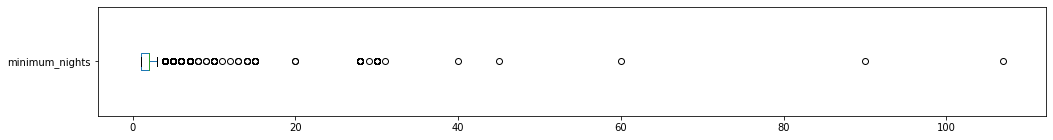

minimum_nights: Valores acima de 30:
6 entradas
0.0680%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(17, 2))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: Valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para *price*

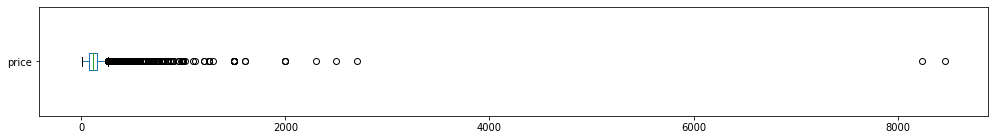


price: Valores acima de 1200
22 entradas
0.2492%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(17, 2),)
plt.show()

# ver quantidade de valores acima de 1200 para price
print("\nprice: Valores acima de 1200")
print("{} entradas".format(len(df[df.price > 1200])))
print("{:.4f}%".format((len(df[df.price > 1200]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1250), figsize=(15,3));

#### Histogramas sem *outliers*

Uma vez identificados *outliers*, neste caso nas variáveis `price` e `minimum_nights`, faz-se necessário excluir esses registros do *DataFrame* e plotar novamente os gráficos de histograma.
* Adotaremos em relação à variável `price` a exclusão dos valores acima de 1000 euros por diária;
* Da mesma forma, relativamente à variável `minimum_nights`, faremos a exclusão dos valores acima de 30 dias.

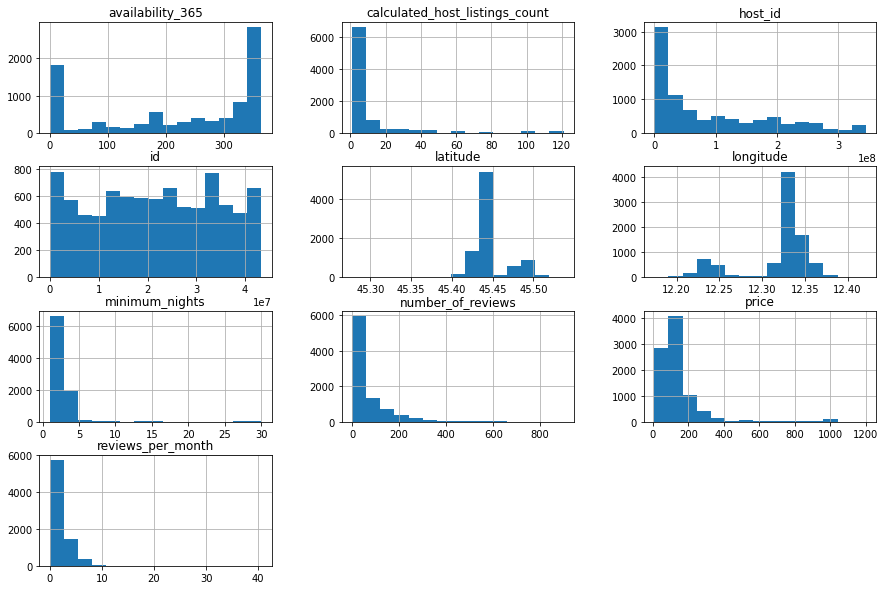

In [0]:
# removendo os *outliers* e gravando os registros em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

___


### **Q5. Qual a correlação existente entre as variáveis?**

**Correlação** significa dizer que há uma relação positiva, neutra ou negativa entre duas variáveis. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, iremos então:

* Criar uma matriz de correlação
* Gerar um *heatmap* (mapa de calor) a partir dessa matriz, usando a biblioteca `seaborn`

No nosso caso, não foram identificadas fortes correlações entre as variáveis mais importantes apresentadas.

In [0]:
# criando uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrando a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.027090,-0.158184,-0.160079,0.231368,0.025977
minimum_nights,0.027090,1.000000,0.003019,-0.082346,-0.015364,-0.027555
number_of_reviews,-0.158184,0.003019,1.000000,0.747269,-0.164252,0.061268
reviews_per_month,-0.160079,-0.082346,0.747269,1.000000,-0.175291,0.038601
calculated_host_listings_count,0.231368,-0.015364,-0.164252,-0.175291,1.000000,0.064402
availability_365,0.025977,-0.027555,0.061268,0.038601,0.064402,1.000000


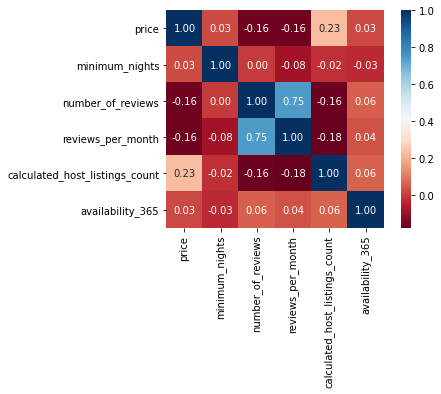

In [0]:
# plotando um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

___


### **Q6. Quais os tipos de imóveis mais oferecidos para locação no Airbnb, na cidade de Veneza?**


A coluna `room_type` contém os dados da variável que indica o tipo de acomodação apresentada no anúncio do Airbnb. Pra quem nunca utilizou o plataforma, existem ali opções de apartamentos/casas inteiras, aluguel de um único quarto do imóvel, de um quarto de hotel ou mesmo o aluguel de um quarto compartilhado com outras pessoas.

Vamos, portanto, contar a quantidade de ocorrências de cada tipo de unidade de locação anunciada no Airbnb em Veneza, usando o método `value_counts()`.

Percebe-se aqui pela demonstração abaixo, que os apartamentos/casas inteiras predominam dentre as acomodações ofertadas na cidade de Veneza, sendo mais de 75% delas. Em seguida estão os quartos com 20% do total.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6635
Private room       1786
Hotel room          318
Shared room          62
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df.shape[0]

Entire home/apt    0.751501
Private room       0.202288
Hotel room         0.036018
Shared room        0.007022
Name: room_type, dtype: float64

___


### **Q7. Qual o preço médio das diárias em Veneza?**

Após as devidas análises dos dados faltantes e exclusões dos dados chamados de *outliers*, calculamos o preço médio das diárias (variável `price`) em Veneza, chegando ao valor de 141,72 euros.

In [0]:
# ver a média da coluna `price``
df_clean.price.mean()

141.7242358822861

___

### **Q8. Qual bairro de Veneza tem os imóveis mais caros para locação?**



A partir do agrupamento das acomodações por bairros, fizemos um levantamento para saber o preço médio das diárias em cada um deles.
 
Foi identificado que **o bairro de San Marco, localizado no centro histórico de Veneza, tem 1040 unidades para locação e é o mais caro da cidade com uma diária média de 200 euros.** Dentre os 10 bairros mais caros abaixo apresentados temos ali presentes todos os 6 do centro histórico, ou seja, quem quiser desfrutar o melhor da ilha e dos seus inúmeros atrativos, evitandos os custos e o tempo de deslocamento, terá que desembolsar um pouco mais.

Além disso, calculamos os preços médios das diárias para os imóveis do continente (*terraferma*) e das ilhas (*isole*) em geral, chegando aos seguintes valores:
* *Isole*      = 152,79 euros
* *Terraferma* =  93,42 euros
 


<center><img alt="Veneza" width="80%" src="https://github.com/leandroguarato/data_science/raw/master/Veneza.png"></center>

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
San Marco                      200.155769
Tessera                        199.789474
Ca' Emiliani                   196.333333
Dorsoduro                      170.787834
Zona Commerciale via Torino    167.500000
San Polo                       152.718373
Santa Croce                    150.215748
Castello                       142.017073
Cannaregio                     139.957216
Lido                           139.848765
Name: price, dtype: float64

Análise da variável `neighbourhood_group`, que verifica se os imóveis estão em alguma ilha ou no continente.

In [0]:
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:20]

neighbourhood_group
Isole         152.793436
Terraferma     93.427179
Name: price, dtype: float64

Aqui verificamos a quantidade de imóveis no bairro de *San Marco*, com o objetivo de constatar se há poucos registros, o que pode distorcer os resultados. 
Entretanto, com 1040 registros, entendemos que os valores estão bem distribuídos e o resultado condiz com a realidade do local.

In [0]:
print(df_clean[df_clean.neighbourhood == "San Marco"].shape)

(1040, 16)


___


### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Neste ponto passamos a analisar a variável `minimum_nights`, que significa a quantidade mínima de noites exigida pelos anfitriões para locação de seus imóveis. Obtivemos como resultado um número médio de aproximadamente 2,1 noites por acomodação ofertada.

In [0]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

2.0902170207930917


Por fim, plotaremos um  gráfico de dispersão com a localização dos imóveis pela cidade de Veneza, utilizando as variáveis `latitude` e `longitude`.

___

### **Q10. Como os imóveis para locação estão distribuídos pela cidade de Veneza?**

Podemos notar claramente uma grande dispersão dos imóveis pelos bairros da cidade de Veneza, tanto nas ilhas quanto no continente. Apesar disso, há também uma certa sobreposição dos pontos em alguns locais, principalmente no centro histórico, uma vez que é uma característica da cidade os imóveis verticais, com dois, três e até quatro andares tendo, por vezes, várias acomodações disponíveis para locação no mesmo imóvel.

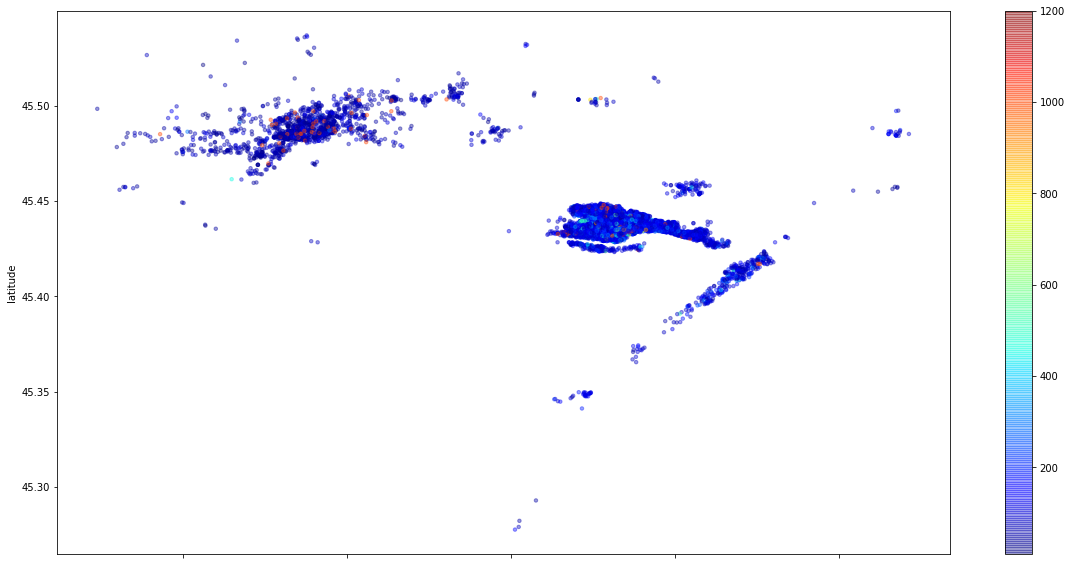

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=12,
              cmap=plt.get_cmap('jet'), figsize=(20,10));

## Conclusões


Com base nos dados fornecidos pelo Airbnb fizemos uma análise superficial de algumas variáveis, retirando alguns insights, como:

a) quais são os tipos de imóveis mais oferecidos para locação por meio do Airbnb em Veneza;\
b) preço médio das diárias na cidade de Veneza; \
c) preço médio das diárias nos 10 bairros mais caros da cidade;\
d) preço médio das diárias em acomodações situadas no continente (*terraferma*) e nas ilhas (*isole*);\
e) distribuição das acomodações pela cidade.

Uma vez que os dados utilizados são uma pequena fração do conjunto de dados completo disponibilizado pela Airbnb, entendemos que em uma próxima abordagem podemos estender os estudos pelas demais variáveis (106 ao todo) com vistas a obter insights mais abrangentes e profundos, ao mesmo tempo.

